In [19]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
from statistics import median

In [20]:
"""
Author: Kavindu Chamith
Date: 26/08/2021
Description: Using Bilateral,​ ​Gaussian and Median filtering for
             noise removal
"""

'\nAuthor: Kavindu Chamith\nDate: 26/08/2021\nDescription: Using Bilateral,\u200b \u200bGaussian and Median filtering for\n             noise removal\n'

In [21]:
# function for displaying a grayscale image
def showImage(img):
    plt.imshow(img, cmap='gray')
    plt.show()

In [22]:
def convolution2D(img, kernal, rotate): 
    # kernal should be rotated 180 degrees before applying to convolution
    if rotate: 
        newkernal = np.rot90(kernal, 2)
    else: 
        newkernal = kernal 
    newimg = np.zeros(img.shape, dtype='uint8') 
    kernal_size = kernal.shape[0]
    padImg = np.pad(img, pad_width=kernal_size//2) # padding with zeros

    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            extracted = padImg[row:row+kernal_size, col: col+kernal_size]
            val = np.sum(extracted * newkernal)
            # rounding off values to 8bit integers
            newimg[row][col] = 255 if val > 255 else 0 if val < 0 else math.ceil(val)
    return newimg


In [23]:
def gaussianFilter(img, size, sigma):
    k = 1/(2*math.pi*sigma*sigma)
    kernal = np.zeros([size, size])

    # calculating values for the gaussian kernal
    for row in range(size):
        for col in range(size):
            s = row - (size//2) 
            t = col - (size//2)
            kernal[row][col] = (k * math.exp(-(s*s + t*t)/(2 * (sigma*sigma))))

    weight = np.sum(kernal) # weightor sum of the kernal

    # divide by the weight or sum
    for row in range(size):
        for col in range(size):
            kernal[row][col] = kernal[row][col]/weight
    # use previously implemented convolution function to apply the kernal
    return convolution2D(img, kernal, False)   

In [24]:
def medianFilter(img, ksize):
    padSize = (ksize-1)//2

    # replicate the border for padding
    padImg = np.pad(img, pad_width=padSize, mode='edge') 
    newImg = np.zeros(img.shape, dtype='uint8')

    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            # extract the kernal/window from the padded image
            kernal = padImg[row:row+ksize, col:col+ksize]
            med = median(kernal.reshape(1,ksize*ksize)[0]) # calculate the median
            newImg[row][col] = med
    return newImg

In [25]:
def bilatFilter(img, ksize, sigmar, sigmad):
    padSize = (ksize-1)//2
    padImg = np.pad(img, pad_width=padSize, mode='edge')
    newImg = np.zeros(img.shape, dtype='uint8')

    k1 = 1/(2*math.pi*sigmad*sigmad) # domain kernal constant 
    k2 = 1/(math.sqrt(2*math.pi)*sigmar) # range kernal constant

    dkernal = np.zeros([ksize, ksize]) # domain kernal
    rkernal = np.zeros([ksize, ksize]) # range/intensity kernal

    # calculating the domain kernal component
    for row in range(ksize):
        for col in range(ksize):
            s = row - (ksize//2)
            t = col - (ksize//2)
            dkernal[row][col] = k1 * math.exp(-(s*s + t*t)/(2 * (sigmad*sigmad)))

    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            # extract window from the padded image to calculate range kernal
            extracted = padImg[row:row+ksize, col:col+ksize]
            for i in range(ksize):
                for j in range(ksize):
                    intensity = int(img[row][col])-int(extracted[i][j])
                    rkernal[i][j] = k2 * math.exp(-(intensity*intensity)/(2 * (sigmar*sigmar)))
            newkernal = (rkernal * dkernal)/np.sum(rkernal * dkernal)
            # caculate the new pixel value using kernals
            val = np.sum(newkernal * extracted)
            # apply the new pixel value
            newImg[row][col] = 255 if val > 255 else 0 if val < 0 else math.floor(val)
    return newImg            

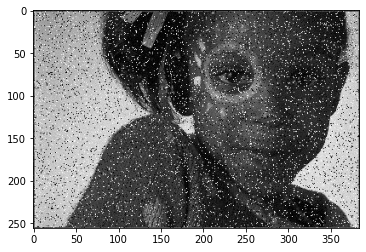

In [26]:
if __name__ == '__main__':
    # reading the image
    noisyImage = cv2.imread('spunifnoisy.jpg', 0)
    showImage(noisyImage)

[[10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10]]


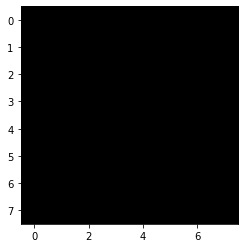

In [27]:
    # given image
    X = np.zeros([8, 8], dtype='uint8')
    X.fill(10)
    print(X)
    showImage(X)

In [28]:
    # kernal
    Y = np.array([[-1,-1,-1], [0,0,0], [1,1,1]])
    print(Y)

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


[[20 30 30 30 30 30 30 20]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


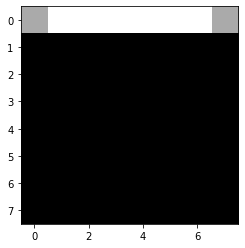

In [29]:
    """convolution using buit in function"""
    newarr = cv2.filter2D(X, -1, Y, borderType=cv2.BORDER_CONSTANT)
    print(newarr) # array representation
    # showImage(newarr)

[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [20 30 30 30 30 30 30 20]]


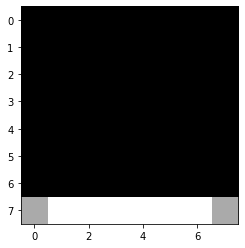

In [30]:
    """convolution using custom function"""
    newarr2 = convolution2D(X, Y, True) 
    print(newarr2) # array representation
    # showImage(newarr2)

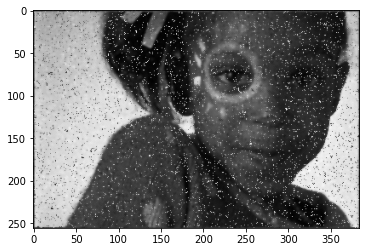

In [31]:
    """bilateral filtering using built-in function"""

    ### sigma d = 100 and sigma r = 50 ### 
    blat1 = cv2.bilateralFilter(noisyImage, 5, 100, 50, borderType=cv2.BORDER_CONSTANT)

    ### sigma d = 350 and sigma r = 100 ###
    # blat1 = cv2.bilateralFilter(noisyImage, 5, 350, 100, borderType=cv2.BORDER_CONSTANT)
    showImage(blat1)

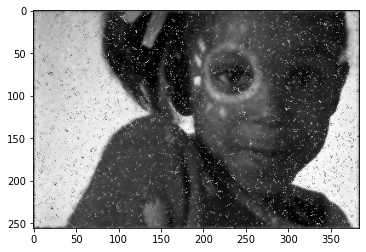

In [32]:
    """bilateral filtering using custom function"""

    ### sigma d = 100 and sigma r = 50 ###
    bilat2 = bilatFilter(noisyImage, 5, 100, 50) 

    ### sigma d = 350 and sigma r = 100 ###
    # bilat2 = bilatFilter(noisyImage, 5, 350, 100) 
    showImage(bilat2)

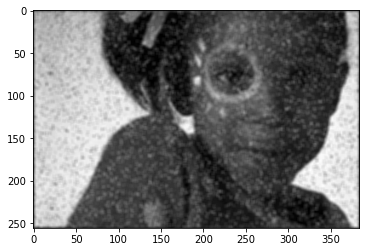

In [33]:
    """gaussian filtering using built-in function"""
    g1 = cv2.GaussianBlur(noisyImage, (5,5), 2, borderType=cv2.BORDER_CONSTANT)
    showImage(g1)

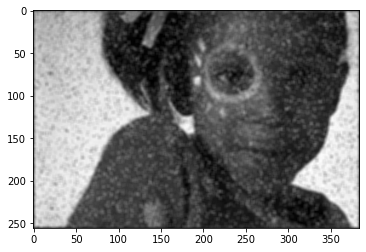

In [34]:
    """gaussian filtering using custom function"""
    g2 = gaussianFilter(noisyImage, 5, 2)
    showImage(g2)

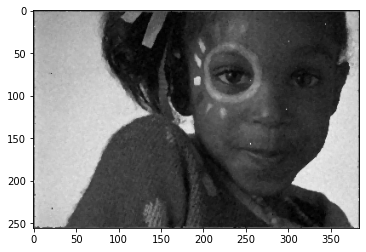

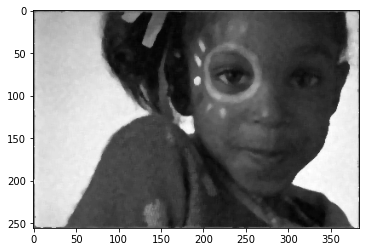

In [35]:
    """median filter using built-in function"""
    med1 = cv2.medianBlur(noisyImage, 3) # window size = 3
    med2 = cv2.medianBlur(noisyImage, 5) # window size = 5
    showImage(med1)
    showImage(med2)

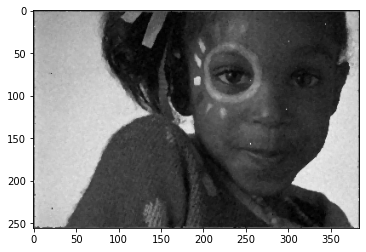

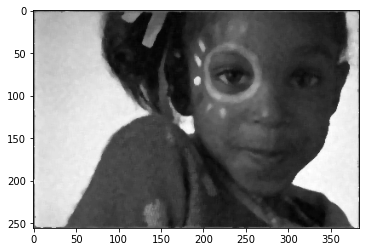

In [36]:
    """median filter using custom function"""
    med3 = medianFilter(noisyImage, 3) # window size = 3
    med4 = medianFilter(noisyImage, 5) # window size = 5
    showImage(med3)
    showImage(med4)